# DAMASK tutorial

- creating necessary inputs for damask
- defining the elastoplastic model (with powerlaw) for tensile test
- runing the damask jobs

here more option is given to the user to select from damask python package itself.

Author: Yang Bai

Date  : 23.02.2022

Update: 01.08.2022

## Importing libraries and creatign Project

In [1]:
from pyiron_continuum import Project
from damask import Rotation # this will be used in material configuration

### create a 'project' to manage all the configurations for a tensile test

In [2]:
pr = Project('RollingTest')
pr.remove_jobs(silently=True) # automatically delete the existing project folder

### Creating the Damask job

In [3]:
job = pr.create.job.ROLLING('damask_job')

#### for a damask job, one needs:
- geometry information(i.e., the mesh)
- material configuration(material.yaml)
- boundary conditions(i.e., loading.yaml)

### For material configuration
#### for elastoplastic material

In [4]:
elasticity = pr.continuum.damask.Elasticity(type= 'Hooke', C_11= 106.75e9,
                                   C_12= 60.41e9, C_44=28.34e9)
plasticity = pr.continuum.damask.Plasticity(type='phenopowerlaw',
                                            N_sl=[12], a_sl=2.25,
                                            atol_xi=1.0, dot_gamma_0_sl=0.0015,
                                            h_0_sl_sl=85e6, h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4, 1.4],
                                            n_sl=25, output=['xi_sl'],
                                            xi_0_sl=[36e6], xi_inf_sl=[63e6])


#### for material configuration, you need
- phase
- roation
- homogenization

In [5]:
grains = 4
grids = 4

phase = pr.continuum.damask.Phase(composition='Aluminum', lattice= 'cF',
                         output_list=['F', 'P', 'F_e', 'F_p', 'L_p', 'O'],
                         elasticity=elasticity,plasticity=plasticity)
rotation = pr.continuum.damask.Rotation(Rotation.from_random, grains)

homogenization = pr.continuum.damask.Homogenization(method='SX', 
                                                     parameters={'N_constituents': 1,
                                                                 "mechanical": {"type": "pass"}})

# now you can define your material.yaml configuration
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)

# now you can save your material to your job
job.material = material

## For geometry information

In [6]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1.0e-5, grid_dim=grids, num_grains=grains)

# save the geometry information to your job
job.grid = grid 

# Define the 1st rolling test

In [7]:
reduction_height = 0.005
reduction_speed = 1.05e-3
reduction_outputs = 40
regrid_flag=False
damask_exe = '' # using default DAMASK_grid solver from PATH

# execute the rolling test
job.executeRolling(reduction_height,reduction_speed,reduction_outputs,regrid_flag,damask_exe)

working dir: /home/ybai/Projects/GitHub/pyiron_continuum/notebooks/RollingTest/damask_job_hdf5/damask_job
solver: {mechanical: spectral_basic}

loadstep:
  - boundary_conditions:
      mechanical:
        P:
          - [0, x, x]
          - [x, x, x]
          - [x, x, x]
        dot_F:
          - [x, 0, 0]
          - [0, 0, 0]
          - [0, 0, -0.00105]
    discretization: {t: 4.761904761904762, N: 40}
    f_out: 5
    f_restart: 5

Start the first rolling test ...
First rolling test is done !


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


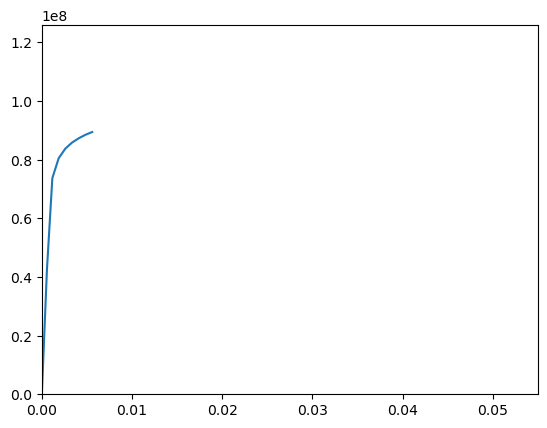

In [8]:
# show the result
job.postProcess() # do the postprocess
job.plotStressStrainCurve(0.0,0.055,0.0,1.26e8) # xmin,xmax, ymin,ymax

# Now, we can do the 2nd rolling test, with different parameters

In [9]:
reduction_height = 0.012
reduction_speed = 1.1e-3
reduction_outputs = 45
regrid_flag=False
damask_exe = '' # using default DAMASK_grid solver from PATH

# execute the rolling test
job.executeRolling(reduction_height,reduction_speed,reduction_outputs,regrid_flag,damask_exe)

Start the rolling-2 test ...
Rolling-2 test is done !


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


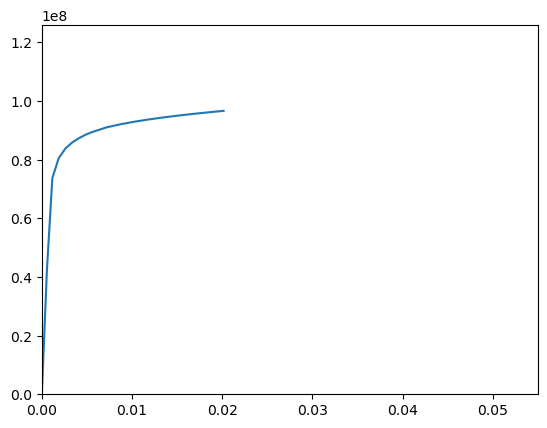

In [10]:
# show the result
job.postProcess() # do the postprocess
job.plotStressStrainCurve(0.0,0.055,0.0,1.26e8) # xmin,xmax, ymin,ymax

# Now, we do the 3rd rolling test with finer mesh (regridding)

In [11]:
reduction_height = 0.015
reduction_speed = 1.2e-3
reduction_outputs = 55
regrid_flag=True # enable the regridding
damask_exe = '' # using default DAMASK_grid solver from PATH

# execute the rolling test
job.executeRolling(reduction_height,reduction_speed,reduction_outputs,regrid_flag,damask_exe)

------------------------
Start to regrid the geometry ...
initial RVE size:	 [1.e-05 1.e-05 1.e-05]
regridded RVE size:	 [1.01661379e-05 1.00000000e-05 9.83000000e-06]
initial grid seeds:	 [4 4 4]
regridded grid seeds:	 [6 6 6]
finding the nearest neighbors...
all the information are ready !
save regrid geometry to damask_regridded_increment_85.vti
removing the existing restart file.
A regridding history file is created.
------------------------
Regridding process is completed.
Start the rolling-3 test ...
Rolling-3 test is done !


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


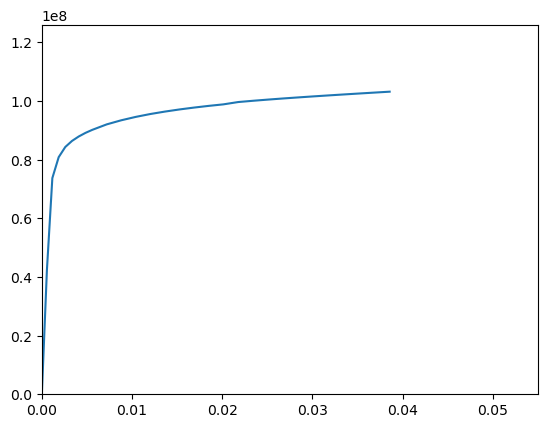

In [12]:
# show the result
job.postProcess() # do the postprocess
job.plotStressStrainCurve(0.0,0.055,0.0,1.26e8) # xmin,xmax, ymin,ymax

# Now, we do the 4th rolling test with even finer mesh (regridding)

In [13]:
reduction_height = 0.02
reduction_speed = 1.3e-3
reduction_outputs = 65
regrid_flag=True # enable the regridding
damask_exe = '' # using default DAMASK_grid solver from PATH

# execute the rolling test
job.executeRolling(reduction_height,reduction_speed,reduction_outputs,regrid_flag,damask_exe)

------------------------
Start to regrid the geometry ...
initial RVE size:	 [1.01661379e-05 1.00000000e-05 9.83000000e-06]
regridded RVE size:	 [1.04949943e-05 1.00000000e-05 9.51544000e-06]
initial grid seeds:	 [6 6 6]
regridded grid seeds:	 [10  9  9]
finding the nearest neighbors...
all the information are ready !
save regrid geometry to damask_regridded_increment_85_regridded_increment_140.vti
removing the existing restart file.
A regridding history file is created.
------------------------
Regridding process is completed.
Start the rolling-4 test ...
Rolling-4 test is done !


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


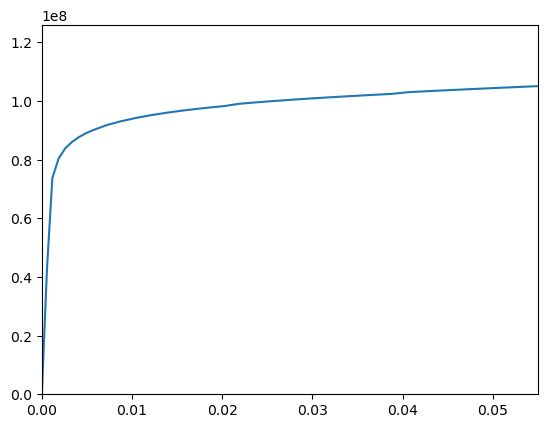

In [14]:
# show the result
job.postProcess() # do the postprocess
job.plotStressStrainCurve(0.0,0.055,0.0,1.26e8) # xmin,xmax, ymin,ymax

In [15]:
# List out all the hdf5 results file
print(job.ResultsFile)

['damask_load.hdf5', 'damask_load_rolling2.hdf5', 'damask_regridded_increment_85_load_rolling3.hdf5', 'damask_regridded_increment_85_regridded_increment_140_load_rolling4.hdf5']
